In [79]:
import pandas as pd
from google.colab import drive

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import numpy as np

!pip install --upgrade category_encoders
import category_encoders  as ce
from matplotlib import pyplot as plt

drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
data_frame = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/secondary_data.csv",sep=";")

In [81]:
data_frame.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


# Separando la variable a predecir

In [82]:
X = data_frame.drop('class', axis=1)
y = data_frame['class']

In [83]:
y = y.map({"e":1,"p":0})

# Division de sets 

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=13)

In [85]:
X_train[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_train[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')
X_validation[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_validation[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')
X_test[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_test[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')

In [86]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy='most_frequent')
mode = simple.fit_transform(X_train)

In [87]:
X_train = pd.DataFrame(simple.transform(X_train), columns = X_train.columns)
X_validation = pd.DataFrame(simple.transform(X_validation), columns = X_validation.columns)
X_test = pd.DataFrame(simple.transform(X_test), columns = X_test.columns)

In [88]:
X_train

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.74,f,k,n,f,d,c,y,5.02,28.73,unknown,k,n,unknown,unknown,f,f,unknown,d,a
1,1.27,f,s,y,f,f,f,f,3.79,5.63,unknown,unknown,y,unknown,unknown,f,f,unknown,d,a
2,12.05,f,y,e,f,a,c,w,6.03,23.98,b,unknown,n,unknown,w,t,e,unknown,d,a
3,8.08,x,t,y,f,p,c,y,6.04,14.95,unknown,unknown,y,unknown,y,t,f,unknown,d,a
4,6.44,x,h,n,f,e,c,w,12.23,12.77,unknown,s,w,u,w,f,f,unknown,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,8.53,o,t,n,f,f,f,f,3.63,25.28,unknown,g,n,unknown,unknown,f,f,unknown,d,s
48851,10.66,f,e,b,f,a,c,b,5.1,19.52,unknown,unknown,w,unknown,unknown,t,f,unknown,d,a
48852,1.62,x,i,k,f,a,c,w,3.73,2.63,unknown,unknown,w,unknown,unknown,f,f,p,g,a
48853,1.29,x,t,n,f,a,c,n,5.0,2.45,unknown,s,n,unknown,unknown,f,f,k,g,a


In [89]:
X_validation

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,7.81,s,t,y,f,x,c,y,6.27,18.18,unknown,unknown,y,unknown,unknown,f,f,unknown,d,a
1,10.96,o,t,e,f,f,f,f,3.89,26.2,unknown,g,n,unknown,unknown,f,f,unknown,d,s
2,9.27,x,i,n,f,a,c,n,11.77,18.76,s,unknown,n,unknown,e,f,f,unknown,d,a
3,7.93,x,y,w,t,a,c,n,7.56,13.68,s,unknown,w,unknown,unknown,t,l,unknown,g,a
4,9.96,x,t,y,f,p,c,y,8.33,15.72,unknown,unknown,y,unknown,y,t,f,unknown,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,13.53,f,t,r,t,d,c,n,6.19,16.4,unknown,unknown,n,unknown,unknown,f,f,unknown,d,a
6103,3.55,x,t,n,f,a,c,n,4.84,6.47,unknown,y,n,unknown,unknown,t,z,unknown,d,w
6104,4.16,x,s,o,f,p,c,n,5.16,10.51,unknown,unknown,n,unknown,unknown,f,f,unknown,d,u
6105,4.51,x,h,l,f,s,c,u,6.44,9.02,unknown,y,n,unknown,unknown,t,e,k,g,a


In [90]:
X_test

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,2.38,p,t,n,f,a,c,n,8.13,2.59,unknown,t,y,unknown,unknown,t,e,unknown,m,a
1,2.35,b,t,n,f,a,c,g,5.48,2.31,unknown,s,g,unknown,unknown,f,f,unknown,d,u
2,7.7,b,y,w,f,a,c,k,14.78,18.18,unknown,unknown,w,unknown,unknown,f,f,unknown,d,a
3,5.64,c,k,w,t,x,c,y,6.76,12.15,unknown,unknown,w,unknown,unknown,f,f,unknown,g,a
4,5.69,x,t,y,t,x,c,y,7.84,14.56,unknown,unknown,w,unknown,unknown,f,f,unknown,d,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,10.65,x,t,g,t,x,c,n,10.0,22.49,s,unknown,n,unknown,u,f,f,unknown,d,a
6103,5.2,c,t,n,f,e,c,w,12.43,13.25,unknown,s,n,u,w,f,f,unknown,d,u
6104,8.51,f,y,n,f,e,c,p,4.52,13.0,unknown,unknown,w,unknown,unknown,t,l,unknown,w,a
6105,9.27,x,t,n,f,a,d,w,11.46,32.54,unknown,unknown,w,unknown,unknown,f,f,unknown,d,a


# Encoding

OHE

In [91]:
ohe_ring = OneHotEncoder(drop='first')

encoded_ring_train = ohe_ring.fit_transform(X_train[['has-ring']]).todense().astype(int)
encoded_ring_validation = ohe_ring.transform(X_validation[['has-ring']]).todense().astype(int)
encoded_ring_test = ohe_ring.transform(X_test[['has-ring']]).todense().astype(int)

encoded_bruise_train = ohe_ring.fit_transform(X_train[['does-bruise-or-bleed']]).todense().astype(int)
encoded_bruise_validation = ohe_ring.transform(X_validation[['does-bruise-or-bleed']]).todense().astype(int)
encoded_bruise_test = ohe_ring.transform(X_test[['does-bruise-or-bleed']]).todense().astype(int)

In [92]:
X_train['has-ring'] = encoded_ring_train
X_validation['has-ring'] = encoded_ring_validation
X_test['has-ring'] = encoded_ring_test

X_train['does-bruise-or-bleed'] = encoded_bruise_train
X_validation['does-bruise-or-bleed'] = encoded_bruise_validation
X_test['does-bruise-or-bleed'] = encoded_bruise_test

binaryEncoding

In [93]:
bin_encoded = ce.BinaryEncoder(cols=["cap-shape","cap-surface","cap-color","gill-attachment","gill-spacing","gill-color","stem-root","stem-surface",
                                     "stem-color","veil-type","veil-color","ring-type","spore-print-color","habitat" ,"season"], return_df = True)

bin_encoded.fit(X_train)
X_train = bin_encoded.transform(X_train)
X_validation = bin_encoded.transform(X_validation)
X_test = bin_encoded.transform(X_test)

# Regresion Logistica

In [94]:
log_reg = LogisticRegression(max_iter=2000)
params = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none']},
    {'C': [0.0001, 0.001, 0.01, 0.1 , 1, 10, 100]},
]

rs = RandomizedSearchCV(log_reg, param_distributions=params, n_iter=5, random_state=13, scoring='roc_auc')
rs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

RandomizedSearchCV(estimator=LogisticRegression(max_iter=2000), n_iter=5,
                   param_distributions=[{'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none']},
                                        {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                               100]}],
                   random_state=13, scoring='roc_auc')

In [95]:
rs.best_params_

{'penalty': 'none'}

In [96]:
model = rs.best_estimator_

In [97]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=2000, penalty='none')

In [98]:
model.coef_

array([[ 1.08192517e-01, -7.49805491e-01,  2.26996434e-01,
         2.03654359e-01,  7.72601294e-03,  3.53295322e-02,
         4.78442026e-01, -4.98300078e-01, -6.45695924e-01,
        -2.46325704e-01, -6.02092616e-01,  3.25035406e-01,
        -5.73570341e-01,  4.98161163e-01, -3.45752829e-01,
        -1.02596002e+00,  7.59198678e-01,  1.57551395e+00,
         1.50714068e-01, -4.97795456e-01,  6.18245936e-01,
        -6.58704190e-01,  1.77968268e-01, -5.25197539e-02,
        -1.85738560e+01, -1.10210034e+00, -8.40160093e-01,
        -1.20612794e+01, -3.28923317e-01,  1.07602105e+00,
        -3.22852188e-02, -1.91687439e-01, -1.33327607e-01,
         8.34032172e-01,  1.46272993e+00, -1.19796025e+01,
        -6.93427072e+00, -3.02342332e+01,  1.36720501e+01,
         1.07670384e+01, -1.23771254e-01,  3.54643836e+00,
        -3.59089491e-01,  8.57947520e-01,  2.69442405e+00,
         2.15216958e+01, -2.06116513e+00, -1.02702683e-01,
         8.73947378e+00,  7.27903122e+00,  4.07630363e-0

In [99]:
importances_list = [item for sublist in abs(model.coef_) for item in sublist]

In [100]:
features_binary = model.feature_names_in_

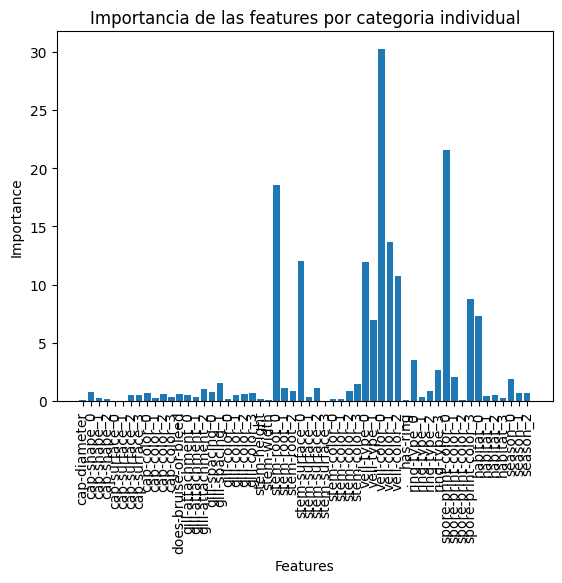

In [101]:
plt.bar(X_train.columns, importances_list)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importancia de las features por categoria individual')
plt.xticks(rotation=90)
plt.show()

In [102]:
dicc = {}
for i in range ( 0 , len(features_binary) ):
  features_binary_clean = features_binary[i].split('_')[0]
  if features_binary_clean not in dicc:
    dicc[features_binary_clean] = importances_list[i]
  else:
    dicc[features_binary_clean] += importances_list[i]

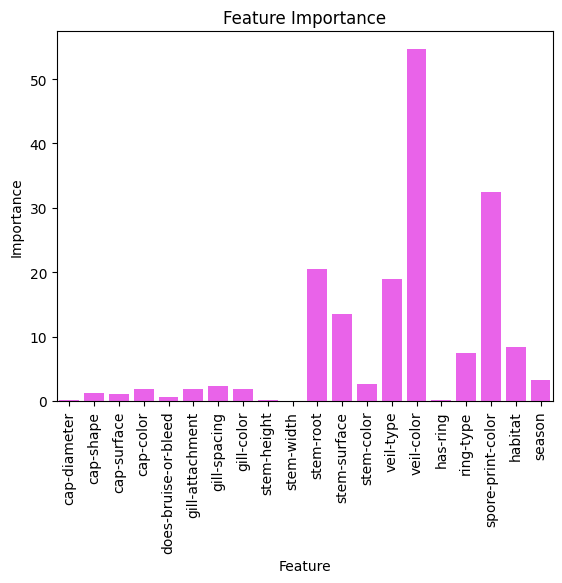

In [103]:
my_df = pd.DataFrame(dicc.items())
my_df.columns = ['Feature' , 'Importance']

import seaborn as sns
ax = sns.barplot(x='Feature', y='Importance', data=my_df, color = '#ff4dff')
ax.set(xlabel = 'Feature', ylabel='Importance', title='Feature Importance',)
plt.xticks(rotation=90)
plt.show()

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [105]:
y_pred = model.predict(X_validation)

In [106]:
cm = confusion_matrix(y_validation, y_pred)
cm

array([[2761,  613],
       [ 749, 1984]])

In [107]:
from sklearn.metrics import roc_auc_score

Resultados previos

In [108]:
#previo_validation (C:1) = 0.7057257464639632
#previo_validation (C:0.1) = 0.7063677766760124

In [109]:
roc_auc_score(y_validation, y_pred)

0.7721293631526334

Para el de Test

In [110]:
y_predict_test = model.predict(X_test)

In [111]:
roc_auc_score(y_test, y_predict_test)

0.7607182793626484